# Классификация птиц

Или "Краткое введение в анализ данных"

Основные инструменты, которые используются для анализа:

numpy - операции с матрицами
pandas - создание и изменение таблиц
scikit-learn - машинное обучение
matplotlib - графики

В исследуемом датасете исследуется принадлежность птицы к одной из шести базовых экологических ниш, такие как плавающие, поющие, хищные и.т.д. Логично ожидать, что от образа жизни птицы зависит строение её скелета. В датасете описываются 10 параметров, описывающих кости птиц - длина и ширина костей с непонятными латинскими названиями. Задача - предсказание экологической ниши (типа) птицы по этим параметрам.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn.model_selection import cross_val_score

In [4]:
data = pd.read_csv('downloads/bird.csv', sep = ',', engine = 'python')

# Базовые возможности pandas

Pandas поддерживает множество разнообразных операций с таблицами, такие как добавление и удаление данных или выбор данных по параметрам. Это используется для приведения данных в вид, удобный для дальнейщего анализа.

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW
5,5,61.92,4.78,50.46,3.47,49.52,4.41,56.95,2.73,29.07,2.83,SW
6,6,79.73,5.94,67.39,4.50,42.07,3.41,71.26,3.56,37.22,3.64,SW
7,7,86.98,5.68,74.52,4.55,44.46,3.78,76.02,3.81,37.94,3.81,SW
8,8,118.20,7.82,116.64,6.13,59.33,5.45,110.00,5.58,61.62,4.37,SW
9,9,145.00,10.42,144.00,7.05,70.96,7.44,120.00,7.31,78.67,6.34,SW


In [7]:
print(data)

      id    huml   humw   ulnal  ulnaw   feml  femw    tibl  tibw   tarl  \
0      0   80.78   6.68   72.01   4.88  41.81  3.70    5.50  4.03  38.70   
1      1   88.91   6.63   80.53   5.59  47.04  4.30   80.22  4.51  41.50   
2      2   79.97   6.37   69.26   5.28  43.07  3.90   75.35  4.04  38.31   
3      3   77.65   5.70   65.76   4.77  40.04  3.52   69.17  3.40  35.78   
4      4   62.80   4.84   52.09   3.73  33.95  2.72   56.27  2.96  31.88   
5      5   61.92   4.78   50.46   3.47  49.52  4.41   56.95  2.73  29.07   
6      6   79.73   5.94   67.39   4.50  42.07  3.41   71.26  3.56  37.22   
7      7   86.98   5.68   74.52   4.55  44.46  3.78   76.02  3.81  37.94   
8      8  118.20   7.82  116.64   6.13  59.33  5.45  110.00  5.58  61.62   
9      9  145.00  10.42  144.00   7.05  70.96  7.44  120.00  7.31  78.67   
10    10  165.00  11.45  156.00   8.68  80.25  7.85  143.00  8.25  86.61   
11    11  186.00   9.83  152.00   8.76  56.02  7.02  185.00  8.07  90.80   
12    12  17

In [8]:
data.index

RangeIndex(start=0, stop=420, step=1)

In [9]:
data.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [10]:
data.tail()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
415,415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15,SO
416,416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15,SO
417,417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21,SO
418,418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98,1.24,SO
419,419,17.89,1.44,19.26,1.10,17.62,1.34,29.81,1.24,21.69,1.05,SO


Имеет смысл убрать столбец id


In [11]:
data = data.drop('id', axis=1)

In [12]:
data

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW
5,61.92,4.78,50.46,3.47,49.52,4.41,56.95,2.73,29.07,2.83,SW
6,79.73,5.94,67.39,4.50,42.07,3.41,71.26,3.56,37.22,3.64,SW
7,86.98,5.68,74.52,4.55,44.46,3.78,76.02,3.81,37.94,3.81,SW
8,118.20,7.82,116.64,6.13,59.33,5.45,110.00,5.58,61.62,4.37,SW
9,145.00,10.42,144.00,7.05,70.96,7.44,120.00,7.31,78.67,6.34,SW


In [13]:
print(data.shape)
print(data.columns)

(420, 11)
Index(['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw',
       'tarl', 'tarw', 'type'],
      dtype='object')


In [14]:
data.index

RangeIndex(start=0, stop=420, step=1)

In [15]:
data.at[2, 'type']

'SW'

In [16]:
data['type']

0      SW
1      SW
2      SW
3      SW
4      SW
5      SW
6      SW
7      SW
8      SW
9      SW
10     SW
11     SW
12     SW
13     SW
14     SW
15     SW
16     SW
17     SW
18     SW
19     SW
20     SW
21     SW
22     SW
23     SW
24     SW
25     SW
26     SW
27     SW
28     SW
29     SW
       ..
390    SO
391    SO
392    SO
393    SO
394    SO
395    SO
396    SO
397    SO
398    SO
399    SO
400    SO
401    SO
402    SO
403    SO
404    SO
405    SO
406    SO
407    SO
408    SO
409    SO
410    SO
411    SO
412    SO
413    SO
414    SO
415    SO
416    SO
417    SO
418    SO
419    SO
Name: type, Length: 420, dtype: object

In [17]:
data['type'][3]

'SW'

In [18]:
data['type'].dtype.name

'object'

In [19]:
type(data['type'])

pandas.core.series.Series

In [20]:
type(data['type'][3])

str

In [21]:
data[['huml', 'type']].head()

,huml,type
0,80.78,SW
1,88.91,SW
2,79.97,SW
3,77.65,SW
4,62.80,SW


Итак, мы убедились - pandas работает и исправно выполняет команды

# Анализ данных - общие наблюдения

С помощью интруметов pandas и графиков mathplot lib можно "на глазок" оценить зависимости между данными, например по их корелляции.

In [22]:
data.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,419.000000,419.000000,417.000000,418.000000,418.000000,419.000000,418.000000,419.000000,419.000000,419.000000
mean,64.650501,4.370573,69.115372,3.597249,36.872416,3.220883,64.662823,3.182339,39.229976,2.930024
std,53.834549,2.854617,58.784775,2.186747,19.979082,2.023581,37.838145,2.080827,23.184313,2.185673
min,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,25.170000,2.190000,28.050000,1.870000,21.297500,1.715000,36.417500,1.565000,23.035000,1.425000
50%,44.180000,3.500000,43.710000,2.945000,31.130000,2.520000,52.120000,2.490000,31.740000,2.230000
75%,90.310000,5.810000,97.520000,4.770000,47.120000,4.135000,82.870000,4.255000,50.250000,3.500000
max,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


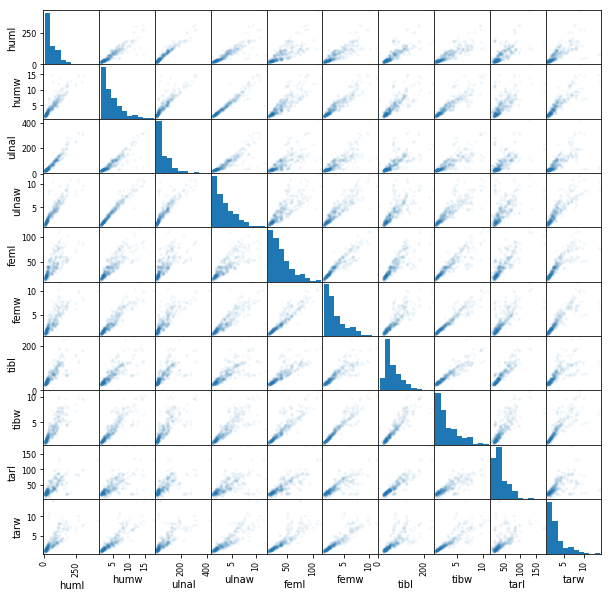

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .05, figsize = (10, 10))
pass

In [24]:
data.corr()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
huml,1.000000,0.916572,0.976377,0.887025,0.771054,0.850474,0.826899,0.869339,0.695027,0.751122
humw,0.916572,1.000000,0.900770,0.957790,0.871023,0.936179,0.820093,0.901478,0.676207,0.892047
ulnal,0.976377,0.900770,1.000000,0.871604,0.759309,0.837922,0.761994,0.818507,0.653622,0.737557
ulnaw,0.887025,0.957790,0.871604,1.000000,0.826243,0.898133,0.797017,0.870392,0.642814,0.870590
feml,0.771054,0.871023,0.759309,0.826243,1.000000,0.944668,0.859952,0.904081,0.832182,0.869299
femw,0.850474,0.936179,0.837922,0.898133,0.944668,1.000000,0.868170,0.959632,0.778986,0.901852
tibl,0.826899,0.820093,0.761994,0.797017,0.859952,0.868170,1.000000,0.928618,0.922262,0.736695
tibw,0.869339,0.901478,0.818507,0.870392,0.904081,0.959632,0.928618,1.000000,0.825557,0.855164
tarl,0.695027,0.676207,0.653622,0.642814,0.832182,0.778986,0.922262,0.825557,1.000000,0.605585
tarw,0.751122,0.892047,0.737557,0.870590,0.869299,0.901852,0.736695,0.855164,0.605585,1.000000


Ожидаемо, данные сильно коррелируют. Это происходит из-за того, что любой параметр кости птицы сильно коррелирует с размером самой птицы, а, как результат, и с остальными параметрами.

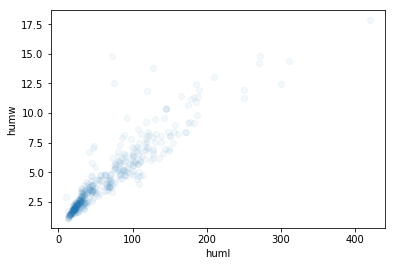

In [25]:
plt.plot(data['huml'], data['humw'], 'o', alpha = 0.05)
plt.xlabel('huml')
plt.ylabel('humw')
pass

In [26]:
data['type'] == 'SW'

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
390    False
391    False
392    False
393    False
394    False
395    False
396    False
397    False
398    False
399    False
400    False
401    False
402    False
403    False
404    False
405    False
406    False
407    False
408    False
409    False
410    False
411    False
412    False
413    False
414    False
415    False
416    False
417    False
418    False
419    False
Name: type, Length: 420, dtype: bool

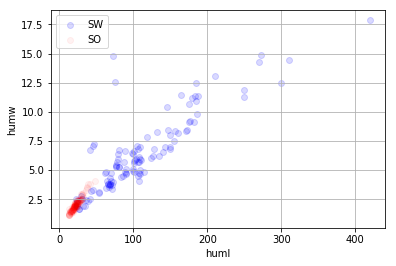

In [27]:
plt.scatter(data[data['type'] == 'SW']['huml'],
            data[data['type'] == 'SW']['humw'],
            alpha = 0.15,
            label = 'SW',
            color = 'b')

plt.scatter(data[data['type'] == 'SO']['huml'],
            data[data['type'] == 'SO']['humw'],
            alpha = 0.05,
            label = 'SO',
            color = 'r')

plt.xlabel('huml')
plt.ylabel('humw')
plt.legend()
plt.grid()

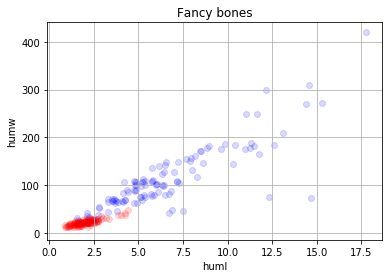

In [28]:
np.random.seed(0)
education_num_rnd = data['humw'] + np.random.rand(data.shape[0]) - .5

plt.scatter(education_num_rnd[data['type'] == 'SW'],
            data[data['type'] == 'SW']['huml'],
            alpha = 0.15,
            label = 'SW',
            color = 'b')

plt.scatter(education_num_rnd[data['type'] == 'SO'],
            data[data['type'] == 'SO']['huml'],
            alpha = 0.15,
            label = 'SO',
            color = 'r')

plt.xlabel('huml')
plt.ylabel('humw')
plt.title('Fancy bones')
plt.grid()

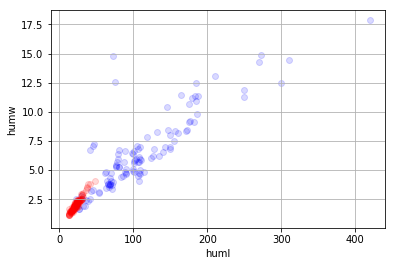

In [29]:
plt.scatter(data[data['type'] == 'SW']['huml'],
            data[data['type'] == 'SW']['humw'],
            alpha = 0.15,
            label = 'SW',
            color = 'b')

plt.scatter(data[data['type'] == 'SO']['huml'],
            data[data['type'] == 'SO']['humw'],
            alpha = 0.15,
            label = 'SO',
            color = 'r')

plt.xlabel('huml')
plt.ylabel('humw')
plt.grid()

In [30]:
data.describe(include = ['object'])

,type
count,420
unique,6
top,SO
freq,128


In [31]:
data.describe(include = 'all')

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
count,419.000000,419.000000,417.000000,418.000000,418.000000,419.000000,418.000000,419.000000,419.000000,419.000000,420
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SO
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128
mean,64.650501,4.370573,69.115372,3.597249,36.872416,3.220883,64.662823,3.182339,39.229976,2.930024,NaN
std,53.834549,2.854617,58.784775,2.186747,19.979082,2.023581,37.838145,2.080827,23.184313,2.185673,NaN
min,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000,NaN
25%,25.170000,2.190000,28.050000,1.870000,21.297500,1.715000,36.417500,1.565000,23.035000,1.425000,NaN
50%,44.180000,3.500000,43.710000,2.945000,31.130000,2.520000,52.120000,2.490000,31.740000,2.230000,NaN
75%,90.310000,5.810000,97.520000,4.770000,47.120000,4.135000,82.870000,4.255000,50.250000,3.500000,NaN


Почему-то в отметим, что методы unique, top, freq могут не справляться с данными числового характера.

In [32]:
data['type'].unique()

array(['SW', 'W', 'T', 'R', 'P', 'SO'], dtype=object)

# Подготовка данных

Чтобы данные корректно анализировались и мы могли провести сравнение по интересующему нас параметру (например, рассмотреть данные только на некоторые типы птиц), необходимо провести некоторую подготовку данных, которая обеспечит корректный анализ.

In [33]:
data['type'].dtype.name

'object'

In [34]:
data['humw'].dtype.name

'float64'

In [35]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['type']
['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw']


In [36]:
for c in categorical_columns:
    print(c, data[c].unique())

type ['SW' 'W' 'T' 'R' 'P' 'SO']


## Обрабатываем пропущенные значения

Иногда какие-то данные могут быть опущениы. Причин тому несколько - интервьируемый может отказаться отвечать на вопрос или данные просто недоступны. Пропущенные данные заполняем либо медианой (для числовых значений), либо самым частым значением (для типа object).

In [37]:
data.median(axis = 0)

huml     44.180
humw      3.500
ulnal    43.710
ulnaw     2.945
feml     31.130
femw      2.520
tibl     52.120
tibw      2.490
tarl     31.740
tarw      2.230
dtype: float64

In [38]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [39]:
data[numerical_columns].count(axis = 0)

huml     420
humw     420
ulnal    420
ulnaw    420
feml     420
femw     420
tibl     420
tibw     420
tarl     420
tarw     420
dtype: int64

In [40]:
data[categorical_columns].count(axis = 0)

type    420
dtype: int64

In [41]:
data['type'].describe()

count     420
unique      6
top        SO
freq      128
Name: type, dtype: object

In [42]:
type(data['type'].describe())

pandas.core.series.Series

In [43]:
data['type'].describe().top

'SO'

In [44]:
data['type'] = data['type'].fillna('SO')

In [45]:
data.describe(include = [object])

,type
count,420
unique,6
top,SO
freq,128


In [46]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [47]:
data.describe(include = [object])

,type
count,420
unique,6
top,SO
freq,128


## Векторизация

Векторизация - процесс приведения одного парметра, принимающего несколь Проводилась бы стандартно для столбца типа object. Вот только в объясняющих переменных все значения - числовые.

In [55]:
#binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
#nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
#print(binary_columns, nonbinary_columns)

In [56]:
#data['type'].unique()

Раскладываем столбец type на 6 dummy-столбцов.

In [57]:
#data_nonbinary = pd.get_dummies(data[nonbinary_columns])
#print(data_nonbinary.columns)

## Нормализация количественных признаков

Приводим все числовые значения к нулевому среднему и единичному среднеквадратичному отклонению:

In [48]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,64.601762,4.368500,68.933905,3.594143,36.845071,3.219214,64.603095,3.180690,39.212143,2.928357
std,53.779546,2.851524,58.613103,2.181985,19.935272,2.021455,37.757629,2.078617,23.159515,2.183330
min,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,25.205000,2.190000,28.132500,1.870000,21.332500,1.717500,36.472500,1.567500,23.042500,1.427500
50%,44.180000,3.500000,43.710000,2.945000,31.130000,2.520000,52.120000,2.490000,31.740000,2.230000
75%,90.220000,5.805000,97.205000,4.770000,47.100000,4.122500,82.870000,4.252500,50.155000,3.490000
max,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


In [49]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [50]:
data_numerical.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02
mean,5.958197e-16,-1.111280e-15,5.966127e-16,8.194503e-16,-3.409971e-16,-7.483432e-16,-2.460994e-16,-8.871211e-16,2.142466e-15,-1.362138e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.018078e+00,-1.132201e+00,-9.356936e-01,-1.188891e+00,-1.254815e+00,-1.132459e+00,-1.565329e+00,-1.111648e+00,-1.357634e+00,-1.038944e+00
25%,-7.325603e-01,-7.639773e-01,-6.961141e-01,-7.901716e-01,-7.781470e-01,-7.428880e-01,-7.450308e-01,-7.760883e-01,-6.981857e-01,-6.874165e-01
50%,-3.797310e-01,-3.045739e-01,-4.303458e-01,-2.975010e-01,-2.866814e-01,-3.458966e-01,-3.306112e-01,-3.322836e-01,-3.226381e-01,-3.198587e-01
75%,4.763565e-01,5.037656e-01,4.823340e-01,5.388932e-01,5.144113e-01,4.468494e-01,4.837937e-01,5.156358e-01,4.724994e-01,2.572414e-01
max,6.608428e+00,4.724315e+00,6.023672e+00,3.852389e+00,4.024271e+00,4.165706e+00,4.645337e+00,3.776217e+00,5.863156e+00,5.112210e+00


## Соединяем все в одну таблицу

Окончание сведение данных к удобоваримому выводу

In [51]:
data = pd.concat((data_numerical, data[categorical_columns]), axis = 1)
print(data.shape)
#print data.columns

(420, 11)


In [52]:
data.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02
mean,5.958197e-16,-1.111280e-15,5.966127e-16,8.194503e-16,-3.409971e-16,-7.483432e-16,-2.460994e-16,-8.871211e-16,2.142466e-15,-1.362138e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.018078e+00,-1.132201e+00,-9.356936e-01,-1.188891e+00,-1.254815e+00,-1.132459e+00,-1.565329e+00,-1.111648e+00,-1.357634e+00,-1.038944e+00
25%,-7.325603e-01,-7.639773e-01,-6.961141e-01,-7.901716e-01,-7.781470e-01,-7.428880e-01,-7.450308e-01,-7.760883e-01,-6.981857e-01,-6.874165e-01
50%,-3.797310e-01,-3.045739e-01,-4.303458e-01,-2.975010e-01,-2.866814e-01,-3.458966e-01,-3.306112e-01,-3.322836e-01,-3.226381e-01,-3.198587e-01
75%,4.763565e-01,5.037656e-01,4.823340e-01,5.388932e-01,5.144113e-01,4.468494e-01,4.837937e-01,5.156358e-01,4.724994e-01,2.572414e-01
max,6.608428e+00,4.724315e+00,6.023672e+00,3.852389e+00,4.024271e+00,4.165706e+00,4.645337e+00,3.776217e+00,5.863156e+00,5.112210e+00


# Выбор матрицы X и столбца y

Здесь мы явно определяем какие переменные мы будем расстаривать в качестве объясняющих, а какие будут определять классы, по которым будет проводиться анализ

In [53]:
X = data.drop(('type'), axis = 1)
y = data['type']
feature_names = X.columns

In [54]:
type(feature_names)

pandas.core.indexes.base.Index

In [55]:
feature_names

Index(['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw',
       'tarl', 'tarw'],
      dtype='object')

In [56]:
print(X.shape)
print(y.shape)
N, d = X.shape

(420, 10)
(420,)


In [57]:
type(y)

pandas.core.series.Series

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

294 126


# $k$NN

Метод k близжайших соседей. Т.к. датасет относительно небольшой, очень большие значения k выбирать не стоит

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [61]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
scores = cross_val_score(knn, X_train, y_train, cv=5)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_scores = np.mean(1 - scores.mean())

print(err_train, err_test, err_scores)

0.163265306122 0.238095238095 0.248418474111


In [62]:
from sklearn import neighbors

kk = range(1, 20, 1)
err_train = []
err_test = []
for k in kk:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

0.15873015873
1


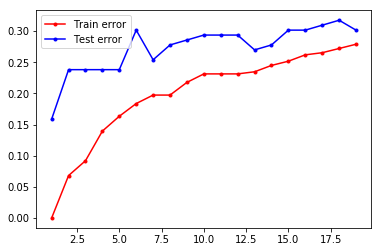

In [63]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)

print (min(err_test))
print (kk[err_test.index(min(err_test))])

In [64]:
err_test = 1 - knn.score(X_test, y_test) # Альтернативный метод подсчёта ошибки

In [65]:
err_test

0.23809523809523814

In [66]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[ 9  0  3  0  0  0]
 [ 0 12  3  0  0  0]
 [ 0  0 44  0  0  0]
 [ 0  1  2 26  2  0]
 [ 2  2  0  0  2  0]
 [ 1  1  4  9  0  3]]


### Подбор параметров - долгий и муторный путь через GridSearch

In [67]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3, 4, 5, 10, 15, 20, 30, 40]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.149659863946 1


In [68]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.15873015873


## SVC

Классификатор, основанный на машине опорных векторов. 

In [69]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
scores = cross_val_score(svc, X_train, y_train, cv=5)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
err_cross = np.mean(1 - scores.mean())

print(err_train, err_test, err_cross)

0.278911564626 0.309523809524 0.340062182024


In [70]:
from sklearn import svm

gamma = range(1, 20, 1)
err_train = []
err_test = []
for k in gamma:
    model = svm.SVC(gamma = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

0.222222222222
3


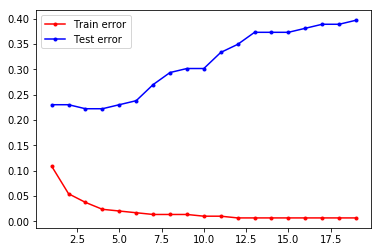

In [71]:
plt.plot(gamma, err_train, '.-r', label = 'Train error')
plt.plot(gamma, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)

print (min(err_test))
print (gamma[err_test.index(min(err_test))])

Покажем, как можно более аккуратно выполнять перебор параметров, не заводя массива напрямую. Очевидный недостаток любого такого переборного метода - считаться будет очень долго.

In [72]:
Cs = 10.**np.arange(-10, 10)
gamma_array = 10.**np.arange(-10, 10)

grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C

print(best_cv_err, best_C)

0.132653061224 1000.0


Результат, как видно, улучшается приблизительно до результата, показанного kNN

## Logistic

In [156]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
scores = cross_val_score(lr, X_train, y_train, cv=5)

err_train = np.mean(y_train != lr.predict(X_train))
err_test  = np.mean(y_test  != lr.predict(X_test))
err_scores = np.mean(1 - scores.mean())

print(err_train, err_test, err_scores)

0.255102040816 0.293650793651 0.306142235181


Алгоритм не справляется с данными без подсказок.

In [160]:
from sklearn import linear_model

gamma = range(1, 20, 1) 

err_train = []
err_test = []
for k in gamma:
    model = linear_model.LogisticRegression(C = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

0.190476190476
10


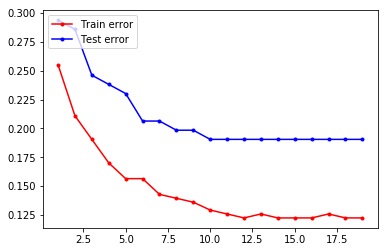

In [161]:
plt.plot(gamma, err_train, '.-r', label = 'Train error')
plt.plot(gamma, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)

print (min(err_test))
print (gamma[err_test.index(min(err_test))])

## LDA и QDA

Т.к. нет оснований считать, что классы линейно или квадратично разделимы, можно предположить, что ошибка будет большой.

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ld = LinearDiscriminantAnalysis()
ld.fit(X_train, y_train)
scores = cross_val_score(ld, X_train, y_train, cv=5)

err_train = np.mean(y_train != ld.predict(X_train))
err_test  = np.mean(y_test  != ld.predict(X_test))
err_scores = np.mean(1 - scores.mean())

print(err_train, err_test, err_scores)

indices = np.arange(y_train.shape[0])

0.278911564626 0.293650793651 0.28590689556


In [76]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qd = QuadraticDiscriminantAnalysis()
qd.fit(X_train, y_train)
scores = cross_val_score(qd, X_train, y_train, cv=5)

err_train = np.mean(y_train != qd.predict(X_train))
err_test  = np.mean(y_test  != qd.predict(X_test))
err_scores = np.mean(1 - scores.mean())

print(err_train, err_test, err_scores)

0.0986394557823 0.214285714286 0.200547142305


Предположение не оправдалось. QDA хорошо справляется с данной задачей. Возможно, это следует из некоторых физических соображений, связанных со строением птиц.

## Naive Bayes

Ожидаем здесь плохой результат, т.к. предположение байесовского классификатора о независимости объясняющих переменных очевидным образом не выполняется, исходя из соображений корреляции.

In [77]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
scores = cross_val_score(gnb, X_train, y_train, cv=5)

err_train = np.mean(y_train != gnb.predict(X_train))
err_test  = np.mean(y_test  != gnb.predict(X_test))
err_scores = np.mean(1 - scores.mean())

print(err_train, err_test, err_scores)

0.493197278912 0.388888888889 0.513569168824


Стоит отметить, что кроссвалидация проблему абсолютно не решает

## Random forests

Мы ожидаем из уже полученных результатов, что данные  сильно кореллируют и, вероятно, наблюдается некоторая квадратичая зависимость между данными. В этих условиях, мы имеем хорошее разделение, которое, однако, требует нескольких деревьев решений для описания. Рассмотрим различные варианты лесов решений и посмотрим, какие из них подходят

In [136]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
scores = cross_val_score(rfc, X_train, y_train, cv=5)

err_train = np.mean(y_train != rfc.predict(X_train))
err_test  = np.mean(y_test  != rfc.predict(X_test))
err_scores = np.mean(1 - scores.mean())

print(err_train, err_test, err_scores)

0.0102040816327 0.214285714286 0.197185147719


In [162]:
from sklearn import ensemble

gamma = range(1, 20, 1) #3 default is 10
err_train = []
err_test = []
for k in gamma:
    model = ensemble.RandomForestClassifier(n_estimators = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

0.190476190476
17


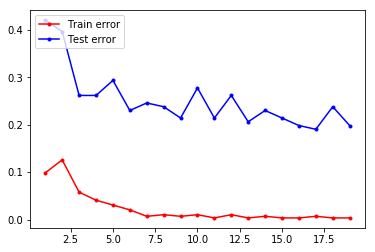

In [163]:
plt.plot(gamma, err_train, '.-r', label = 'Train error')
plt.plot(gamma, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)

print (min(err_test))
print (gamma[err_test.index(min(err_test))])

Полученная картина разумна - 6 деревьев уже дают почти нулевую ошибку на тренировочном сете. В целом метод адекватно справляется со своей задачей. При этом начиная уже с порядка 5 деревьев существенного улучшения не наблюдается.

## Ex.Random Trees

In [167]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
scores = cross_val_score(etc, X_train, y_train, cv=5)

err_train = np.mean(y_train != etc.predict(X_train))
err_test  = np.mean(y_test  != etc.predict(X_test))
err_scores = np.mean(1 - scores.mean())

print(err_train, err_test, err_scores)

0.0 0.174603174603 0.183682028701


In [168]:
from sklearn import ensemble

gamma = range(1, 20, 1) ## default 10
err_train = []
err_test = []
for k in gamma:
    model = ensemble.ExtraTreesClassifier(n_estimators = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

0.119047619048
16


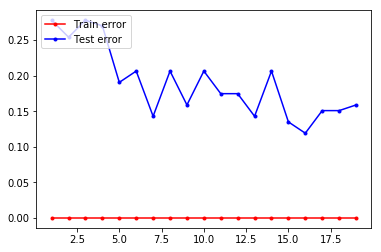

In [169]:
plt.plot(gamma, err_train, '.-r', label = 'Train error')
plt.plot(gamma, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)

print (min(err_test))
print (gamma[err_test.index(min(err_test))])

Вызывает некоторую тревогу то, что ошибка на тренировочном сете идеально нулевая. При этом, он показывает хорошие результаты и в целом лучше своего предка - random forest.

## AdaBoost

In [188]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
scores = cross_val_score(abc, X_train, y_train, cv=5)

err_train = np.mean(y_train != abc.predict(X_train))
err_test  = np.mean(y_test  != abc.predict(X_test))
err_scores = np.mean(1 - scores.mean())

print(err_train, err_test, err_scores)

0.840136054422 0.833333333333 0.650435274166


In [189]:
from sklearn import ensemble

gamma = range(5, 200, 5) # default 50
err_train = []
err_test = []
for k in gamma:
    model = ensemble.AdaBoostClassifier(n_estimators = k, learning_rate = 0.5)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

0.666666666667
75


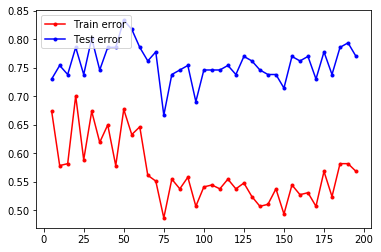

In [190]:
plt.plot(gamma, err_train, '.-r', label = 'Train error')
plt.plot(gamma, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)

print (min(err_test))
print (gamma[err_test.index(min(err_test))])

AdaBoost ведёт себя аномально. Очевидно, подобное поведение классификатора неправильно. При это изменение скорости обучения только меняет график от менее к более рандомизированному, при этом качество классификатора остаётся отрицательным. Это странно, тем более, что прочие эстиматоры ведут себя нормально. Вероятно наблюдается ошибка переобучения (классификатор достаточно силён и бустинг не помогает), но это не объясняет стабльную ошибку более 0.5 на тестовой выборке

## Gradient Boost

In [191]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
scores = cross_val_score(gbc, X_train, y_train, cv=5)

err_train = np.mean(y_train != gbc.predict(X_train))
err_test  = np.mean(y_test  != gbc.predict(X_test))
err_scores = np.mean(1 - scores.mean())

print(err_train, err_test, err_scores)

0.0 0.214285714286 0.200196661807


In [194]:
from sklearn import ensemble

gamma = range(2, 40, 2)
err_train = []
err_test = []
for k in gamma:
    model = ensemble.GradientBoostingClassifier(n_estimators = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

0.261904761905
24


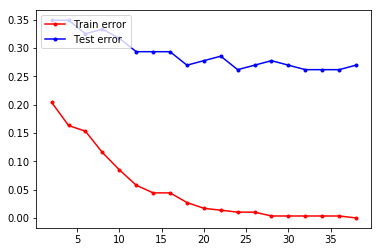

In [195]:
plt.plot(gamma, err_train, '.-r', label = 'Train error')
plt.plot(gamma, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)

print (min(err_test))
print (gamma[err_test.index(min(err_test))])

Градиентный бустниг в отличие от AdaBoost работает адекватно и эффективно. При этом, ошибка на тренировочном тесте быстро стабилизируется.

In [200]:
err_train = []
err_test = []
for k in gamma:
    model = ensemble.GradientBoostingClassifier(n_estimators = k, learning_rate = 0.05)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

0.277777777778
30


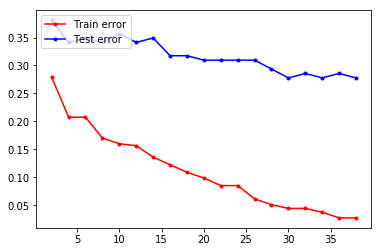

In [201]:
plt.plot(gamma, err_train, '.-r', label = 'Train error')
plt.plot(gamma, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)

print (min(err_test))
print (gamma[err_test.index(min(err_test))])

Изменение learning_rate, ожидаемо влияет на скорость обучения. При этом данный классификатор устойчиво сходится к своему оптимуму при любой скорости обучения

In [212]:
err_train = []
err_test = []
for k in gamma:
    model = ensemble.GradientBoostingClassifier(n_estimators = k, max_depth = 4)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

0.214285714286
32


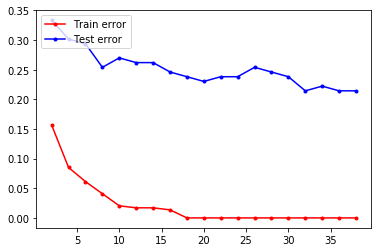

In [213]:
plt.plot(gamma, err_train, '.-r', label = 'Train error')
plt.plot(gamma, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)

print (min(err_test))
print (gamma[err_test.index(min(err_test))])

Опять же, попытка увеличить максимальную допустимую глубину дерева не придит ни к чему, кроме замедления работы программы и более раннего выхода ошибки на тренировочном сете на 0. В целом, можно заключить, что датасет слишком прост для лесов принятия решений и попытки улучшить методы далее быстро приводит к стабилизации ошибки и переобучению.